In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from datetime import timedelta

In [2]:
from mycolorpy import colorlist as mcp

#normalize item number values to colormap
colors = mcp.gen_color(cmap="viridis",n=5)

In [3]:
colors

['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725']

### Let's upload the data and see some examples of time series


In [4]:
#read the timeseries, available at https://doi.org/10.6084/m9.figshare.20079857.v2

df = pd.read_csv('', sep=';')

In [5]:
df.head()

,Unnamed: 0,video_id,channel,created_at,views,views_diff,corrections,hour,hour_from_beginning,correctionsB,interventions
0,0,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 19:00:37,1314,1314.0,0,19,0,0.0,0
1,1,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 20:00:43,1317,3.0,0,20,1,0.0,0
2,2,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 21:00:35,1320,3.0,0,21,2,0.0,0
3,3,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 22:00:34,1324,4.0,0,22,3,0.0,0
4,4,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 23:00:35,1328,4.0,0,23,4,0.0,0


In [6]:
df.video_id.nunique()

270133

In [7]:
df['tot'] = df[['video_id', 'views_diff']].groupby('video_id').views_diff.transform('sum')
df[df.tot > 1000]

,Unnamed: 0,video_id,channel,created_at,views,views_diff,corrections,hour,hour_from_beginning,correctionsB,interventions,tot
0,0,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 19:00:37,1314,1314.0,0,19,0,0.0,0,1712.0
1,1,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 20:00:43,1317,3.0,0,20,1,0.0,0,1712.0
2,2,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 21:00:35,1320,3.0,0,21,2,0.0,0,1712.0
3,3,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 22:00:34,1324,4.0,0,22,3,0.0,0,1712.0
4,4,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 23:00:35,1328,4.0,0,23,4,0.0,0,1712.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45593580,5593579,zzz6kaJ7D94,UCESTwDXpoMgiYBHipMdKTkQ,2021-03-18 10:00:13,32328,67.0,0,10,5593579,0.0,0,32523.0
45593581,5593580,zzz6kaJ7D94,UCESTwDXpoMgiYBHipMdKTkQ,2021-03-18 11:00:12,32388,60.0,0,11,5593580,0.0,0,32523.0
45593582,5593581,zzz6kaJ7D94,UCESTwDXpoMgiYBHipMdKTkQ,2021-03-18 12:00:14,32435,47.0,0,12,5593581,0.0,0,32523.0
45593583,5593582,zzz6kaJ7D94,UCESTwDXpoMgiYBHipMdKTkQ,2021-03-18 13:00:14,32470,35.0,0,13,5593582,0.0,0,32523.0


In [8]:
df['tot_bot'] = df[['video_id', 'correctionsB']].groupby('video_id').correctionsB.transform('sum')

In [9]:
group_by_channel = df[['channel', 'tot', 'tot_bot']].groupby('channel').sum()

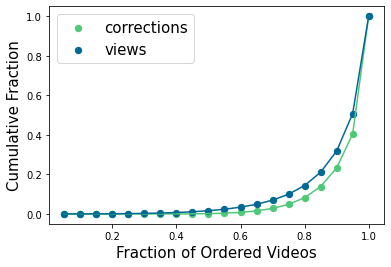

In [10]:
#LORENTZ CURVE FOR THE DISTRIBUTION OF VIEWS AND CORRECTIONS AMONG VIDEOS

figure = plt.figure(facecolor="white")
arr = df.tot_bot.values
arr = np.array(sorted(arr))

# associo ogni 5 per cento di video
tot_bot = []
len = np.size(arr)
for i in np.linspace(5, 100, 20):
    tot_bot.append(np.sum(arr[:int(i*len/100)]))

cum_tot_bot = np.cumsum(tot_bot)

plt.scatter(np.linspace(5, 100, 20)/100, cum_tot_bot/sum(tot_bot), c = '#50c878', s = 40, label = 'corrections')
plt.plot(np.linspace(5, 100, 20)/100, cum_tot_bot/sum(tot_bot), c = '#50c878')

arr = df.tot.values
arr = np.array(sorted(arr))

# associo ogni 5 per cento di video
tot_bot = []
len = np.size(arr)
for i in np.linspace(5, 100, 20):
    tot_bot.append(np.sum(arr[:int(i*len/100)]))

cum_tot_bot = np.cumsum(tot_bot)

plt.scatter(np.linspace(5, 100, 20)/100, cum_tot_bot/sum(tot_bot), c = '#016795', s = 40, label = 'views')
plt.plot(np.linspace(5, 100, 20)/100, cum_tot_bot/sum(tot_bot), c = '#016795')
plt.xlabel('Fraction of Ordered Videos', size = 15)
plt.ylabel('Cumulative Fraction', size = 15)
plt.legend(prop={'size': 15})

plt.savefig('figure_new_1b.pdf')

In [11]:
group_by_channel['fraction_bot'] = group_by_channel['tot_bot']/group_by_channel['tot']

In [12]:
#read the channel list, available at https://doi.org/10.6084/m9.figshare.20079584.v2
channel_list = pd.read_csv('')
channel_list = channel_list[['channel', 'title']]
group_by_channel = pd.merge(channel_list.set_index('channel'), group_by_channel, on = 'channel')
group_by_channel.reset_index()

,channel,title,tot,tot_bot,fraction_bot
0,UClrZcn9PZV7hvNd0O_gsePA,#DémarreTaStory avec l’apprentissage,747780530.0,10529120.0,0.014080
1,UCXfp5IKQSutQvPlrDRKo9xg,#Indecis,3735240.0,53040.0,0.014200
2,UC6joDErOGcFJC1vHNSfsYQg,01net,131858800.0,914940.0,0.006939
3,UCpaOmN-F1fiS19Qh9vI8gAw,1ère outre-mer,94931817.0,426009.0,0.004488
4,UCD25QI36ly-8hWm9OPOz7aw,20MinutesFR,282097005.0,1302577.0,0.004617
...,...,...,...,...,...
1058,UCoREmEcJ5xvu_WPHqhax38Q,Le Monde TV,1700.0,0.0,0.000000
1059,UCXmaHIc810QxEdz7I6QSsIw,La mesnie Païenne,157590.0,3740.0,0.023732
1060,UCQfwfsi5VrQ8yKZ-UWmAEFg,FRANCE 24 English,284261420.0,2925360.0,0.010291
1061,UC-NN7o1eX2ugW16eKMRj_UQ,Saphirnews,58480.0,5780.0,0.098837


In [13]:
group_by_channel = group_by_channel.reset_index()

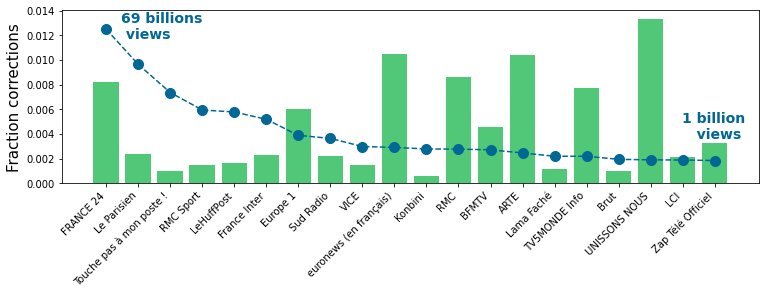

In [14]:
fig, ax = plt.subplots(figsize=(12.5,5),facecolor="white")
# I consider the most views channels
out = group_by_channel.sort_values('tot', ascending=False)[:20]

x = out.title.values
y = out.fraction_bot.values

y2 = out.tot.values
y2_norm = y2/(np.max(y2)*80)

ax.bar(x, y, color= '#50c878')
ax.plot(x,y2_norm, c =  '#016795',  linestyle='--', marker='o',markersize = 10)
ax.text(0.085, 0.82, '69 billions\n views', horizontalalignment='left',  verticalalignment='bottom', transform=ax.transAxes,  c =  '#016795',size = 14, weight="bold")
ax.text(0.89, 0.24, '1 billion\n   views', horizontalalignment='left',  verticalalignment='bottom', transform=ax.transAxes,  c =  '#016795',size = 14, weight="bold")

ax.set_ylabel('Fraction corrections', size = 15)
plt.xticks(rotation=45, ha='right')
fig.subplots_adjust(bottom=0.4)
plt.savefig('figure_new_1c.pdf')

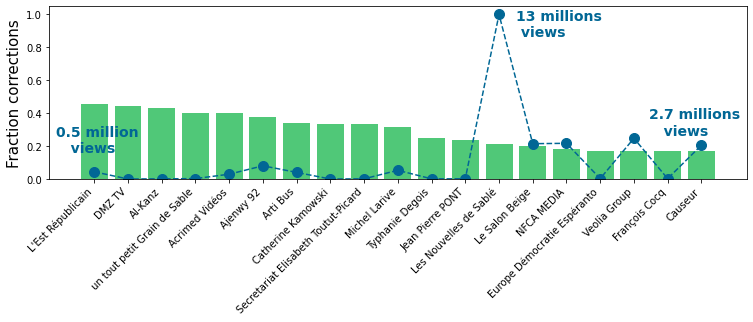

In [15]:
fig, ax = plt.subplots(figsize=(12.5,5),facecolor="white")
# consider the channels with highest fraction of corrections
out = group_by_channel.sort_values('fraction_bot', ascending=False)[1:20]

x = out.title.values
y = out.fraction_bot.values

y2 = out.tot.values
y2_norm = y2/(np.max(y2))

ax.bar(x, y, color= '#50c878')

ax.plot(x,y2_norm, c =  '#016795',  linestyle='--', marker='o',markersize = 10)
ax.text(0.67, 0.81, '13 millions\n views', horizontalalignment='left',  verticalalignment='bottom', transform=ax.transAxes,  c =  '#016795',size = 14, weight="bold")
ax.text(0.86, 0.24, '2.7 millions\n   views', horizontalalignment='left',  verticalalignment='bottom', transform=ax.transAxes,  c =  '#016795',size = 14, weight="bold")
ax.text(0.01, 0.14, '0.5 million\n   views', horizontalalignment='left',  verticalalignment='bottom', transform=ax.transAxes,  c =  '#016795',size = 14, weight="bold")

ax.set_ylabel('Fraction corrections', size = 15)
plt.xticks(rotation=45, ha='right')
fig.subplots_adjust(bottom=0.4)
plt.savefig('figure_new_1d.pdf')

In [16]:
out

,channel,title,tot,tot_bot,fraction_bot
493,UClGLI5zTU7Z2vowQf_XuCzA,L'Est Républicain,592960.0,269960.0,0.455275
241,UCvWagnsCJ9xY0EaP-kT7aUg,DMZ TV,1530.0,680.0,0.444444
36,UCSNN9I8Lvi5C3YiPvSaWtCw,Al-Kanz,12920.0,5610.0,0.434211
978,UCa346_ck5QS_XMY6qbJyTwQ,un tout petit Grain de Sable,34170.0,13770.0,0.402985
14,UCqEwL9lUdH-ccrN4Rgd0sEw,Acrimed Vidéos,395080.0,158440.0,0.401033
35,UCI-4eGs7LgjGCdGUbQy1w4A,Ajenwy 92,1083580.0,405620.0,0.374333
71,UCx3LJBBmyKaUj3nDCY4KFRw,Arti Bus,543012.0,183591.0,0.338098
140,UCduEo4UFNiIshAobFADVyWg,Catherine Kamowski,1020.0,340.0,0.333333
885,UCJ2KjVGTtD0Cb6UX4Z5fW4w,Secretariat Elisabeth Toutut-Picard,17850.0,5950.0,0.333333
688,UCDMgDbI47fpx66wrhnUP3vg,Michel Larive,715020.0,224060.0,0.313362


### Let's evaluate the correlation between fake views and real views per channel

In [17]:
# let's perform a linear regression among the logs of the two quantities
#reliability of coeffients, confidence intervals and p values

import statsmodels.api as sm

x = np.array(group_by_channel.tot_bot.values)
y = np.array(group_by_channel.tot.values)

new_x = x[(x != 0) & (y!= 0)]
new_y = y[(x != 0) & (y!= 0)]

x = new_x
y = new_y

log_group_by_channel = pd.DataFrame({'tot': np.log10(y), 'tot_bot': np.log10(x)})#group_by_channel.copy()
#log_group_by_channel['tot'] = np.log(log_group_by_channel.tot.values)
#log_group_by_channel['tot_bot'] = np.log(log_group_by_channel.tot_bot.values)

model = sm.OLS.from_formula("tot ~ tot_bot", data=log_group_by_channel)
result = model.fit()
result.summary()

/home/castaldm-admin/.local/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tot   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     4366.
Date:                Mon, 18 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:30:09   Log-Likelihood:                -918.99
No. Observations:                 973   AIC:                             1842.
Df Residuals:                     971   BIC:                             1852.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6499      0.085     19.456      0.000       1.483       1.816
tot_bot        1.0555      0.016     66.078      0.000       1.024       1.087
==============================================================================
Omnibus:                       52.253   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.949
Skew:                           0.369   Prob(JB):                     3.26e-22
Kurtosis:                       4.377   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So we have a good linear regression on the logs of corrections and real views.

The value of the intercept is 1.6499	 and the coefficient of the corrections is 1.0555 

let's plot the regression

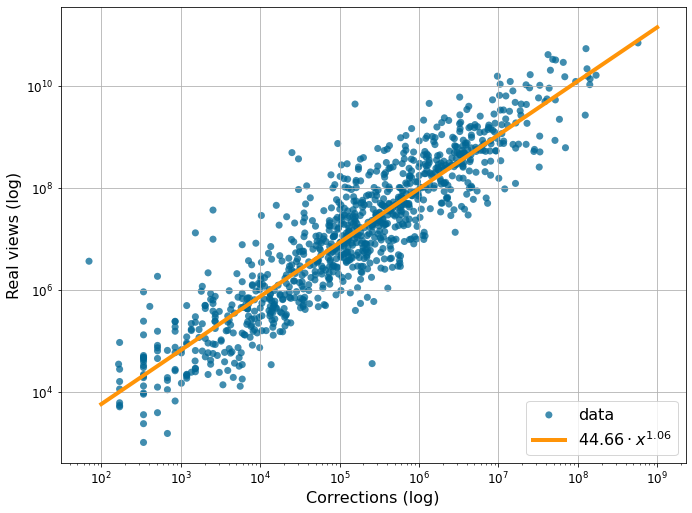

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Abhishek Bhatia's data & scatter plot.

x = np.array(group_by_channel.tot_bot.values)
y = np.array(group_by_channel.tot.values)

new_x = x[(x != 0) & (y!= 0)]
new_y = y[(x != 0) & (y!= 0)]

x = new_x
y = new_y

fig, ax = plt.subplots(1,figsize=(1.4*8,1.4*6), facecolor="white")
ax=plt.gca() 
ax.scatter(x,y,c="#016795", edgecolors='none', label='data', s = 50, alpha = 0.75)
ax.set_yscale('log')
ax.set_xscale('log')


newX = np.logspace(2, 9)


def myExpFunc(x):
    a = 1.6498739483264186 #
    b = 1.05552195
    return np.power(10, a) * np.power(x, b)
    

a = 1.6498739483264186
plt.plot(newX, myExpFunc(newX), c = '#ff9408', linewidth = 4, label="$44.66 \cdot x^{1.06}})$")

plt.xticks(size = 12)
plt.yticks(size = 12)

ax.grid(visible='on')
plt.legend(loc='lower right', prop={'size': 16})
ax.set_xlabel('Corrections (log)',  size = 16)
ax.set_ylabel('Real views (log)',  size = 16)

plt.savefig('figure_new_2b.png')
plt.show()

In [19]:
#let's manipulate data to get new useful quantities and put dates in datetime format
df['created_at'] = pd.to_datetime(df['created_at'], infer_datetime_format=True) 
df.head()

,Unnamed: 0,video_id,channel,created_at,views,views_diff,corrections,hour,hour_from_beginning,correctionsB,interventions,tot,tot_bot
0,0,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 19:00:37,1314,1314.0,0,19,0,0.0,0,1712.0,1.0
1,1,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 20:00:43,1317,3.0,0,20,1,0.0,0,1712.0,1.0
2,2,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 21:00:35,1320,3.0,0,21,2,0.0,0,1712.0,1.0
3,3,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 22:00:34,1324,4.0,0,22,3,0.0,0,1712.0,1.0
4,4,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 23:00:35,1328,4.0,0,23,4,0.0,0,1712.0,1.0


In [20]:
df['start'] = df[['video_id', 'created_at']].groupby('video_id').created_at.transform('min')
df.head()

,Unnamed: 0,video_id,channel,created_at,views,views_diff,corrections,hour,hour_from_beginning,correctionsB,interventions,tot,tot_bot,start
0,0,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 19:00:37,1314,1314.0,0,19,0,0.0,0,1712.0,1.0,2022-01-30 19:00:37
1,1,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 20:00:43,1317,3.0,0,20,1,0.0,0,1712.0,1.0,2022-01-30 19:00:37
2,2,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 21:00:35,1320,3.0,0,21,2,0.0,0,1712.0,1.0,2022-01-30 19:00:37
3,3,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 22:00:34,1324,4.0,0,22,3,0.0,0,1712.0,1.0,2022-01-30 19:00:37
4,4,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 23:00:35,1328,4.0,0,23,4,0.0,0,1712.0,1.0,2022-01-30 19:00:37


In [21]:
df['end'] = df.start + pd.Timedelta(days=7, hours = 2)
df.head()

,Unnamed: 0,video_id,channel,created_at,views,views_diff,corrections,hour,hour_from_beginning,correctionsB,interventions,tot,tot_bot,start,end
0,0,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 19:00:37,1314,1314.0,0,19,0,0.0,0,1712.0,1.0,2022-01-30 19:00:37,2022-02-06 21:00:37
1,1,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 20:00:43,1317,3.0,0,20,1,0.0,0,1712.0,1.0,2022-01-30 19:00:37,2022-02-06 21:00:37
2,2,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 21:00:35,1320,3.0,0,21,2,0.0,0,1712.0,1.0,2022-01-30 19:00:37,2022-02-06 21:00:37
3,3,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 22:00:34,1324,4.0,0,22,3,0.0,0,1712.0,1.0,2022-01-30 19:00:37,2022-02-06 21:00:37
4,4,---jg-Dv9hY,UCzKH70qfN_yuXq3s91fdwmg,2022-01-30 23:00:35,1328,4.0,0,23,4,0.0,0,1712.0,1.0,2022-01-30 19:00:37,2022-02-06 21:00:37


In [22]:
videos = df.video_id.unique()
df = df[df.created_at < df.end]

In [23]:
df['len'] = df[['video_id', 'created_at']].groupby('video_id').created_at.transform('count')

df = df[df.len == 170]

In [27]:
# how many videos do we have left?
df.video_id.nunique()

191433

## general statistics on quantity of videos affected

In [24]:
# percentage of concerned videos
df['tot_bot'] = df[['video_id', 'correctionsB']].groupby('video_id').correctionsB.transform(sum).values
#len(df[df.tot_bot > 0].video_id.unique())/len(df.video_id.unique())

In [25]:
# percentage of concerned videos on raw dataset
df['tot'] = df[['video_id', 'views_diff']].groupby('video_id').views_diff.transform(sum).values
df['tot_bot_raw'] = df[['video_id', 'corrections']].groupby('video_id').corrections.transform(sum).values
#len(df[df.tot_bot_raw > 0].video_id.unique())/len(df.video_id.unique())

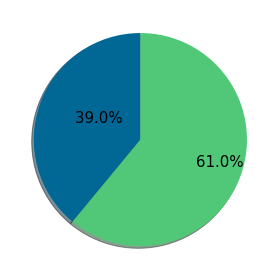

In [26]:
sizes = [1- 0.61, 0.61]
# Pie chart
#labels = ['Uncorrected Videos', 'Corrected Videos']

explode = (0, 0.1)
fig1, ax1 = plt.subplots(facecolor="white")
patches, texts, autotexts = ax1.pie(sizes,  autopct='%12.1f%%', 
        shadow=True, startangle=90, colors=['#016795', '#50c878'])# Equal aspect ratio ensures that pie is drawn as a circle
#texts[0].set_fontsize(15)
#texts[1].set_fontsize(15)
autotexts[0].set_fontsize(15)
autotexts[1].set_fontsize(15)

plt.tight_layout()
fig1.savefig('FIG/Figure1_d.pdf')


In [29]:
# percentage of concerned channel on recostructed dataset
#print('Percentage channels affected on reconstructed data ' + str(len(df[df.tot_bot > 0].channel.unique())/len(df.channel.unique())))
#print('Percentage channels affected on raw data ' + str(len(df[df.tot_bot_raw > 0].channel.unique())/len(df.channel.unique())))

### Plot some examples of temporal series

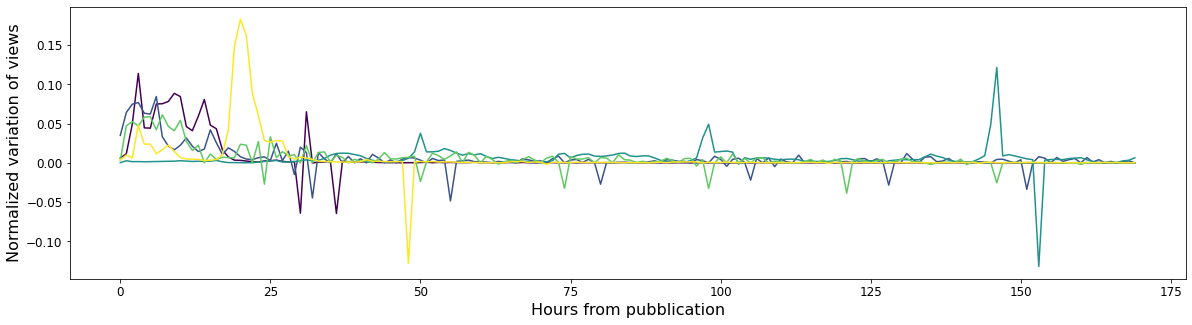

In [30]:
# examples
fig = plt.figure(figsize=(20,5),facecolor="white")

#example_videos = ['4PpQNTb2uUc', 'zzum6E3A4SY', '3e5J9g8hGaQ', 'CbyPaCQ3JT0', 'H9Ai4Sa6RxA']
example_videos = ['4PpQNTb2uUc', 'oGLaS4UUpuE', 'nODAk6djk-g', 'CbyPaCQ3JT0', 'gkbC17fi0jM']

for i,video in enumerate(example_videos):
    views = df[df.video_id == video].views_diff.values
    
    views = views/np.sum(views)
    plt.plot(views, color = colors[i])
    

plt.xlabel('Hours from pubblication', size = 16)
plt.ylabel('Normalized variation of views', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.savefig('figure_new_1a.pdf')

In [31]:
df['hour'] = df['created_at'].dt.hour
df['hour'] = df['hour'].astype(int)
df['day'] = df['created_at'].dt.date

In [32]:
df = df.drop(['corrections'], axis=1)

## Let's study the rhythm of the corrections

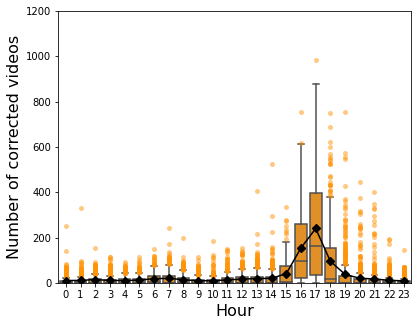

In [33]:
# number of corrections per hour

#DIVIDED NUMBER OF OBSERVATIONS

fig = plt.figure(figsize=(7,5), facecolor="white")
df['hour_corrected'] = False
df.loc[df.correctionsB> 0,'hour_corrected'] = True

hourly_corrections = df[['hour', 'day', 'hour_corrected']].groupby(['hour', 'day']).sum().reset_index() # numero medio di video corretti ogni ora
#hourly_observations = df[['hour', 'day', 'video_id']].groupby(['hour', 'day']).count().reset_index()

#hourly_corrections['hour_corrected'] = hourly_corrections['hour_corrected']/hourly_observations['video_id']
hourly_corrections = hourly_corrections.rename(columns={'hour_corrected': 'n_corrections'})

sns.boxplot(color = '#ff9408',data = hourly_corrections, x = 'hour', y = 'n_corrections',showmeans=True, meanprops={"marker": "D", "markerfacecolor":"black", "markeredgecolor": "black"},flierprops=dict(marker='o', markerfacecolor='#ff9408', markeredgecolor='none', alpha=0.5))
plt.plot(hourly_corrections.groupby('hour').mean().values,  linestyle='-', marker = 'D', color = 'black')
plt.ylim([0,1200])
plt.xlabel('Hour', size = 16)
plt.ylabel('Number of corrected videos', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10)
fig.subplots_adjust(left=0.2)
plt.savefig('FIG/Figure2_b.pdf')
plt.show()

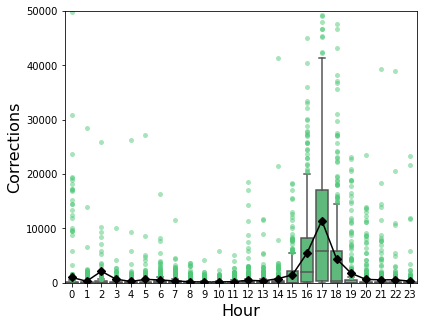

In [34]:
# size of corrections per hour

fig = plt.figure(figsize=(7,5), facecolor="white")

hourly_corrections = df[['hour', 'day', 'correctionsB']].groupby(['hour', 'day']).sum().reset_index()
#hourly_observations = df[['hour', 'day', 'created_at']].groupby(['hour', 'day']).count().reset_index()

#hourly_corrections['correctionsB'] = hourly_corrections['correctionsB']/hourly_observations['created_at']

sns.boxplot(color='#50c878',data = hourly_corrections, x = 'hour', y = 'correctionsB',showmeans=True, meanprops={"marker": "D", "markerfacecolor":"black", "markeredgecolor": "black"},flierprops=dict(marker='o', markerfacecolor='#50c878', markeredgecolor='none', alpha=0.5))
plt.plot(hourly_corrections.groupby('hour').mean().values,  linestyle='-', marker = 'D', color = 'black')
plt.ylim([0,50000])
plt.xlabel('Hour', size = 16)
plt.ylabel('Corrections', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10)
fig.subplots_adjust(left=0.2)
plt.savefig('FIG/Figure2_c.pdf')


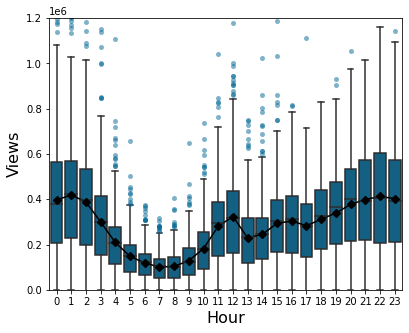

In [35]:
# size of corrections per hour

fig = plt.figure(figsize=(7,5), facecolor="white")

hourly_corrections = df[['hour', 'day', 'views_diff']].groupby(['hour', 'day']).sum().reset_index()
#hourly_observations = df[['hour', 'day', 'created_at']].groupby(['hour', 'day']).count().reset_index()

#hourly_corrections['views_diff'] = hourly_corrections['views_diff']/hourly_observations['created_at']

sns.boxplot(color='#016795',data = hourly_corrections, x = 'hour', y = 'views_diff',showmeans=True, meanprops={"marker": "D", "markerfacecolor":"black", "markeredgecolor": "black"},flierprops=dict(marker='o', markerfacecolor='#016795', markeredgecolor='none', alpha=0.5))
plt.plot(hourly_corrections.groupby('hour').mean().values,  linestyle='-', marker = 'D', color = 'black')
plt.ylim([0,1200000])
plt.xlabel('Hour', size = 16)
plt.ylabel('Views', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10)
fig.subplots_adjust(left=0.2)
plt.savefig('FIG/Figure2_d.pdf')

In [36]:
df_views = df[['views_diff','video_id']].groupby(['video_id']).views_diff.apply(list).reset_index()
df_bot = df[['correctionsB','video_id']].groupby(['video_id']).correctionsB.apply(list).reset_index()

df2 = pd.merge(df_views.set_index('video_id'), df_bot, on = 'video_id')

# free some space in memory
df_views = []
df_bot = []
df_start = []
df2['tot_views'] = df2['views_diff'].apply(lambda x : np.sum(x))
df2['tot_bot'] = df2['correctionsB'].apply(lambda x : np.sum(x))
#df2['len'] = df2['views_diff'].apply(lambda x : len(x))
df2.head()

,video_id,views_diff,correctionsB,tot_views,tot_bot
0,--0kXAUkouU,"[10.0, 32.0, 18.0, 14.0, 17.0, 12.0, 6.0, 18.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",288.0,7.0
1,--1kLmTbpu4,"[745.0, 858.0, 655.0, 749.0, 668.0, 797.0, 731...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11345.0,95.0
2,--3c8C-Ln3M,"[7.0, 6.0, 2.0, 3.0, 3.0, 4.0, 2.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",68.0,0.0
3,--4KMrCmUu4,"[7.0, 2.0, 4.0, 2.0, 1.0, 1.0, 3.0, 3.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",58.0,0.0
4,--4jmO0Q-to,"[0.0, 14.0, 0.0, 6.0, 0.0, 4.0, 7.0, 0.0, 7.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",103.0,4.0


In [37]:
df_start = df[['created_at','video_id']].groupby(['video_id']).created_at.min().reset_index()
df_start['created_at'] = df_start['created_at'].astype(str)
df_start['hour_creation'] = df_start['created_at'].apply(lambda x: x[11:13])
df_start['hour_creation'] = df_start['hour_creation'].astype(int)
df2 = pd.merge(df2.set_index('video_id'), df_start, on = 'video_id')
df_start = []

In [39]:
import numpy as np
# adjust by hour of pubblication
def bool_corrections(x):
    x = np.array(x)
    y = np.zeros(np.size(x))
    y[x>0] = 1
    return y

df2['bool_corrections'] = df2['correctionsB'].apply(bool_corrections)


sum_views = np.zeros(24*8+2)
sum_n_corrections = np.zeros(24*8+2)
sum_size_corrections = np.zeros(24*8+2)

obs_per_hour = np.zeros(24*8+2)

for i, row in df2.iterrows():
    start = row.hour_creation
    n = np.size(row.views_diff)
    obs_per_hour[start:start+n] = obs_per_hour[start:start+n] + 1
    sum_views[start:start+n] = sum_views[start:start+n] + row.views_diff
    sum_size_corrections[start:start+n] = sum_size_corrections[start:start+n] + row.correctionsB
    sum_n_corrections[start:start+n] = sum_n_corrections[start:start+n] + row.bool_corrections

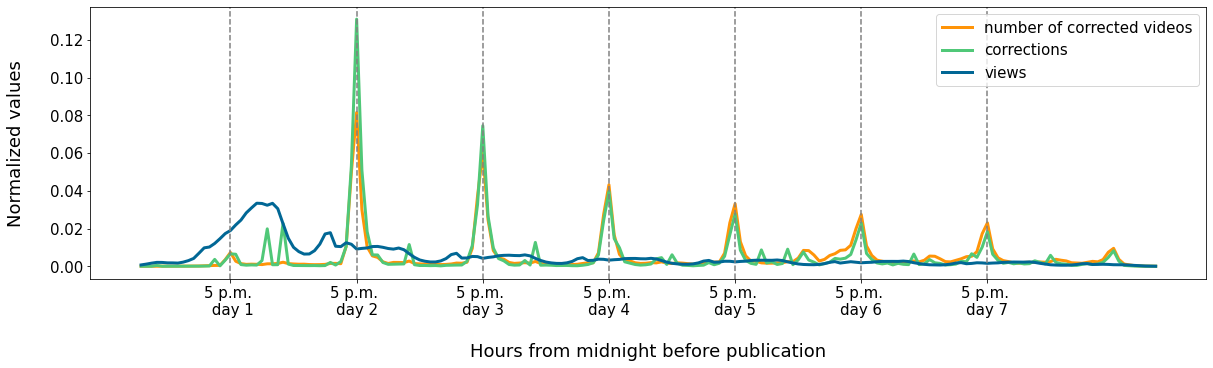

In [40]:
#periodicity of events starting at midnight of the day of pubblication

fig = plt.figure(figsize=(20, 5))

# distribution of number of corrections
temp1 = sum_n_corrections/sum(sum_n_corrections)
plt.plot(temp1, label = 'number of corrected videos', c = '#ff9408', linewidth = 3)

# distribution of amplitude of corrections
temp2 = sum_size_corrections/sum(sum_size_corrections)
plt.plot(temp2, label = 'corrections', c = '#50c878', linewidth = 3)

#distribution of views
temp3 = sum_views/sum(sum_views)
plt.plot(temp3,  label = 'views', c= '#016795', linewidth = 3)


for i in range(7):
    plt.axvline(x = i*24+17, linestyle = '--', color = 'gray')

#plt.axvline(x = 126, linestyle = '--', color = '#016795')
#plt.axvline(x = 126+24, linestyle = '--', color = '#016795')
#plt.axvline(x = 126+2*24, linestyle = '--', color = '#016795')


plt.xticks([17,17+24,17+48,17+3*24,17+4*24,17+5*24,17+6*24], ['5 p.m. \n day 1','5 p.m. \nday 2','5 p.m. \nday 3','5 p.m. \nday 4','5 p.m. \nday 5','5 p.m. \nday 6','5 p.m. \nday 7'],  size = 15)
plt.xlabel(['17 day 1','17 day 2','17 day 3','17 day 4','17 day 5','17 day 6','17 day 7'])

plt.yticks(size = 15)
plt.xlabel('\nHours from midnight before publication', size = 18)
plt.ylabel('Normalized values\n', size = 18)



fig.patch.set_facecolor('white')

plt.legend(fontsize = 15)
fig.savefig('FIG/figure2_a.pdf')